In [11]:
import matplotlib
matplotlib.__file__

# 본인 matplotlib 경로 확인해고 
# install_font.sh 파일의 
# 7 line 두번째 path 수정해야 정상작동함

'/opt/conda/envs/project/lib/python3.8/site-packages/matplotlib/__init__.py'

In [2]:
import json
import pandas as pd 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.rc('font', family='NanumGothicCoding')

In [3]:
class Info:
    def __init__(self):
        self.train = self.get_data('train.json')
        self.val = self.get_data('val.json')
    
    def get_data(self, f_name):
        with open(f_name, mode='r') as f:
            _json = json.load(f)
        ann = pd.DataFrame(_json['annotations'])
        img = pd.DataFrame(_json['images'])
        df = pd.merge(ann, img, left_on='image_id', right_on='id').drop(['id_y'], axis=1).rename(columns={'id_x':'id'})
        return df
    
    def plot(self, img_id):
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        ax.axis('off')

        try:
            self._plot(self.train, img_id, ax)
            fig.suptitle(f'"{img_id}" is in train', size=20)
        except:
            self._plot(self.val, img_id, ax)
            fig.suptitle(f'"{img_id}" is in val', size=20)

    def _plot(self, _df, img_id, ax):
        df = _df.query(f'image_id == "{img_id}"')
        assert len(df), 'this "image id" is not in dataframe'
        path = df['file_name'].values[0]
        img = np.array(Image.open(path))
        ax.imshow(img)
        for bbox in df['bbox']:
            ax.add_patch(patches.Rectangle(
                (bbox[0], bbox[1]), bbox[2], bbox[3], edgecolor='seagreen', 
                fill=False, lw=3
            ))
        ax.set_title(df['file_name'].values[0].split('/')[-2], size=20)
info = Info()


In [11]:
info.train.sample()

,id,image_id,bbox,area,category_id,is_crowd,segmentation,file_name,height,width
34078,34079,90136_60_m_5,"[1516.0, 1533.0, 1083.0, 1079.0]",1168557.0,187,0,0,Training/image/90136_오뚜기진짬뽕(큰컵)115G/90136_60_m...,2988,2988


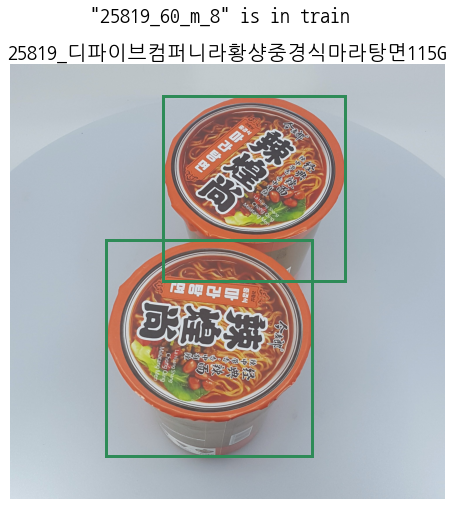

In [23]:
info.plot('25819_60_m_8')